# Part 2: Predicting Breast Cancer Prognosis

Author: Lydia Jeong
<br>
INF2179 - Machine Learning with Applications in Python
<br>
August 21, 2020

## 1. Introduction

Following the collection of the Wisconsin Diagnostic Breast Cancer (WDBS) dataset, Wolberg et al. followed-up with the patients classified in the malignant category. The Wisconsin Prognostic Breast Cancer (WPBC) dataset was purposed to track recurrence or non-recurrence of malignancy over time. With the WPBC, Wolberg and team set out to produce a prognosis prediction model; to predict the time or likelihood of recurrence of cancer in a patient. The WPBC dataset is publicly accessible through UCI Machine Learning Repository: https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+(Prognostic)

## 2. Data Description

The WPBC dataset contains 198 rows x 35 columns. Features in this dataset include:

* 1) ID number
* 2) Outcome (R = recur, N = nonrecur)
* 3) Time (Recurrence time if R, disease-free time if N)
* 3) - 33) 30 cell nuclei features collected in the diagnostic dataset. See WDBC dataset description in Part 1.
* 34) Tumor size
* 35) Lymph node status

There are 151 patients in the non-recur and 47 patients in the recur category.



## 3. Exploratory Data Analysis

### 1. Loading: Load the data into a data structure.

Import libraries that we will be using and load the datasets.

In [235]:
import numpy as np
import pandas as pd
import scipy
import urllib
import sklearn
import seaborn as sns
import pydotplus
import sklearn
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import joblib
from pandas import Series, DataFrame
from pylab import rcParams
from sklearn import neighbors
from sklearn import tree
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn import metrics
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
import xgboost
import csv
from sklearn.linear_model import LinearRegression
#from sklearn.externals.six import StringIO
from io import StringIO
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)
warnings.filterwarnings('ignore', category=DeprecationWarning)

In [273]:
rawdata = 'WPBC.dat'

In [274]:
with open(rawdata, 'r') as rawdata_mem:
    tables = csv.reader(rawdata_mem, delimiter=',')
    data = np.array(list(tables))
print(data)

[['119513' 'N' '31' ... '0.08113' '5' '5']
 ['8423' 'N' '61' ... '0.1189' '3' '2']
 ['842517' 'N' '116' ... '0.09067' '2.5' '0']
 ...
 ['94547' 'N' '12' ... '0.06033' '3.7' '0']
 ['947204' 'R' '3' ... '0.08981' '3' '?']
 ['947489' 'N' '6' ... '0.08036' '3.5' '0']]


In [275]:
df = pd.DataFrame(data, columns=['id', 'outcome', 'time', 'radius_mean', 'texture_mean', 'perimeter_mean', 
                                 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 
                                 'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean', 'radius_se', 
                                 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se', 'compactness_se', 
                                 'concavity_se', 'concave points_se', 'symmetry_se', 'fractal_dimension_se', 
                                 'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst', 
                                 'compactness_worst', 'concavity_worst', 'concave points_worst', 'symmetry_worst', 
                                 'fractal_dimension_worst', 'tumor_size', 'lymph_node_status'])

### 2. Examining the data

In [276]:
df.head()

,id,outcome,time,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,...,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,tumor_size,lymph_node_status
0,119513,N,31,18.02,27.6,117.5,1013,0.09489,0.1036,0.1086,...,139.7,1436,0.1195,0.1926,0.314,0.117,0.2677,0.08113,5,5
1,8423,N,61,17.99,10.38,122.8,1001,0.1184,0.2776,0.3001,...,184.6,2019,0.1622,0.6656,0.7119,0.2654,0.4601,0.1189,3,2
2,842517,N,116,21.37,17.44,137.5,1373,0.08836,0.1189,0.1255,...,159.1,1949,0.1188,0.3449,0.3414,0.2032,0.4334,0.09067,2.5,0
3,843483,N,123,11.42,20.38,77.58,386.1,0.1425,0.2839,0.2414,...,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.173,2,0
4,843584,R,27,20.29,14.34,135.1,1297,0.1003,0.1328,0.198,...,152.2,1575,0.1374,0.205,0.4,0.1625,0.2364,0.07678,3.5,0


In [277]:
df.tail()

,id,outcome,time,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,...,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,tumor_size,lymph_node_status
193,942640,N,10,22.52,21.92,146.9,1597,0.07592,0.09162,0.06862,...,162.1,1902,0.08191,0.1319,0.1056,0.09378,0.2061,0.05788,6,2
194,943471,N,8,15.44,31.18,101,740.4,0.09399,0.1062,0.1375,...,112.6,929,0.1272,0.2362,0.2975,0.1286,0.2914,0.08024,1.5,0
195,94547,N,12,17.17,29.19,110,915.3,0.08952,0.06655,0.06583,...,132.5,1295,0.1261,0.1572,0.2141,0.0952,0.3362,0.06033,3.7,0
196,947204,R,3,21.42,22.84,145,1440,0.107,0.1939,0.238,...,198.3,2375,0.1498,0.4379,0.5411,0.2215,0.2832,0.08981,3,?
197,947489,N,6,16.7,28.13,110.3,885.4,0.08896,0.1131,0.1012,...,128.8,1213,0.133,0.2808,0.3455,0.1317,0.3035,0.08036,3.5,0


After visual inspection of the dataset, it was apparent that the variable lymph node status had four missing values. As a result, these four values were set to the mean of the lymph node status.

In [278]:
df[['lymph_node_status']][df['lymph_node_status'] == "?"]

,lymph_node_status
6,?
28,?
85,?
196,?


In [279]:
index_with_null_values = [6, 28, 85, 196]

for i in index_with_null_values:
    df.at[i, 'lymph_node_status'] = 0

In [280]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 198 entries, 0 to 197
Data columns (total 35 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   id                       198 non-null    object
 1   outcome                  198 non-null    object
 2   time                     198 non-null    object
 3   radius_mean              198 non-null    object
 4   texture_mean             198 non-null    object
 5   perimeter_mean           198 non-null    object
 6   area_mean                198 non-null    object
 7   smoothness_mean          198 non-null    object
 8   compactness_mean         198 non-null    object
 9   concavity_mean           198 non-null    object
 10  concave points_mean      198 non-null    object
 11  symmetry_mean            198 non-null    object
 12  fractal_dimension_mean   198 non-null    object
 13  radius_se                198 non-null    object
 14  texture_se               198 non-null    o

Also, I can see that the types for all features are set to "object". I changed the types for the id variable as integer, the outcome variable as object/categorical, and the rest of the features as float.

In [281]:
for col in df.columns:
    if col == 'id':
        df[col] = df[col].astype(int)
    elif col == 'outcome':
        df[col] = df[col].astype(object)
    else:
        df[col] = df[col].astype(float)

In [282]:
for i in index_with_null_values:
    df.at[i, 'lymph_node_status'] = df.lymph_node_status.mean()

In [283]:
df.shape

(198, 35)

There are 198 rows and 35 columns.

In [284]:
df.describe()

,id,time,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,tumor_size,lymph_node_status
count,1.980000e+02,198.000000,198.000000,198.00000,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,...,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000
mean,1.990469e+06,46.732323,17.412323,22.27601,114.856566,970.040909,0.102681,0.142648,0.156243,0.086776,...,140.347778,1404.958586,0.143921,0.365102,0.436685,0.178778,0.323404,0.090828,2.847475,3.210513
std,2.889025e+06,34.462870,3.161676,4.29829,21.383402,352.149215,0.012522,0.049898,0.070572,0.033877,...,28.892279,586.006972,0.022004,0.163965,0.173625,0.045181,0.075161,0.021172,1.937964,5.423367
min,8.423000e+03,1.000000,10.950000,10.38000,71.900000,361.600000,0.074970,0.046050,0.023980,0.020310,...,85.100000,508.100000,0.081910,0.051310,0.023980,0.028990,0.156500,0.055040,0.400000,0.000000
25%,8.557452e+05,14.000000,15.052500,19.41250,98.160000,702.525000,0.093900,0.110200,0.106850,0.063670,...,118.075000,947.275000,0.129325,0.248700,0.322150,0.152650,0.275950,0.076577,1.500000,0.000000
50%,8.863390e+05,39.500000,17.290000,21.75000,113.700000,929.100000,0.101900,0.131750,0.151350,0.086075,...,136.500000,1295.000000,0.141850,0.351300,0.402350,0.179250,0.310300,0.086890,2.500000,1.000000
75%,9.279958e+05,72.750000,19.580000,24.65500,129.650000,1193.500000,0.110975,0.172200,0.200500,0.103925,...,159.875000,1694.250000,0.154875,0.423675,0.541050,0.207125,0.358800,0.101375,3.500000,4.000000
max,9.411300e+06,125.000000,27.220000,39.28000,182.100000,2250.000000,0.144700,0.311400,0.426800,0.201200,...,232.200000,3903.000000,0.222600,1.058000,1.170000,0.290300,0.663800,0.207500,10.000000,27.000000


Number of Non-recur patients:  151
Number of Recur patients:  47


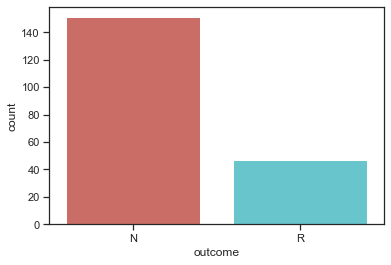

In [285]:
sns.countplot(x='outcome', data=df, palette='hls')
print("Number of Non-recur patients: ", len(df[df['outcome'] == 'N']))
print("Number of Recur patients: ", len(df[df['outcome'] == 'R']))

There are 151 patients in the non-recur category and 47 pateitns in the recur cateogory.

In [286]:
y = df.outcome

# 'id', 'time', and 'outcome' is dropped because 'id' and 'time' is not relevant for classification and 'outcome' is our target variable.
X = df.drop(['id', 'outcome', 'time'], axis = 1)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

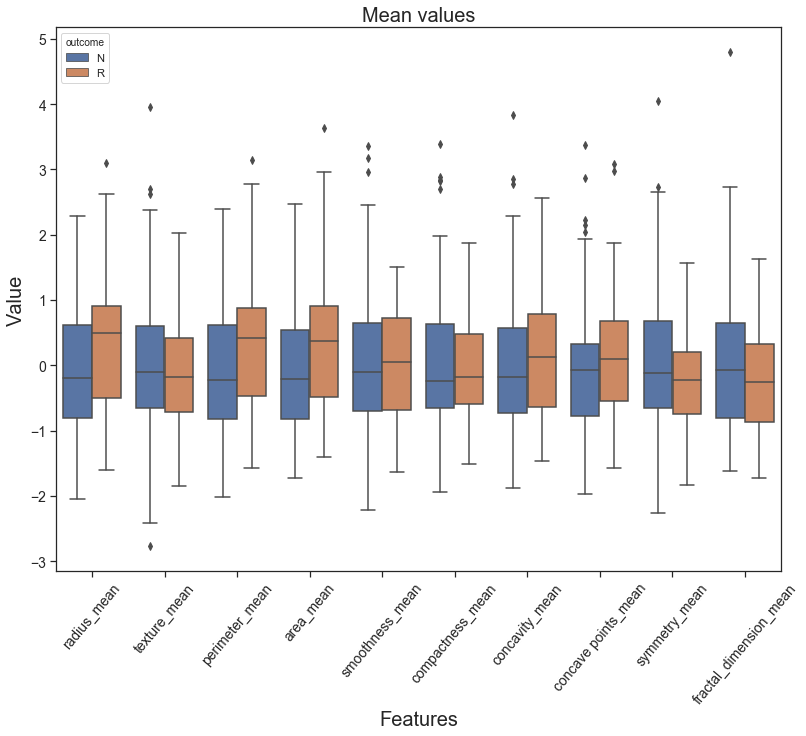

In [287]:
# first ten features
data_dia = y
data = X
data_n_2 = (data - data.mean()) / (data.std())              # standardization
data = pd.concat([y,data_n_2.iloc[:,0:10]],axis=1)
data = pd.melt(data,id_vars="outcome",
                    var_name="features",
                    value_name='value')

plt.figure(figsize=(13,10))

box_plot = sns.boxplot(x="features", y="value", hue="outcome", data=data)
box_plot.axes.set_title("Mean values",fontsize=20)
box_plot.set_xlabel("Features",fontsize=20)
box_plot.set_ylabel("Value",fontsize=20)
box_plot.tick_params(labelsize=14)
plt.xticks(rotation=50)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

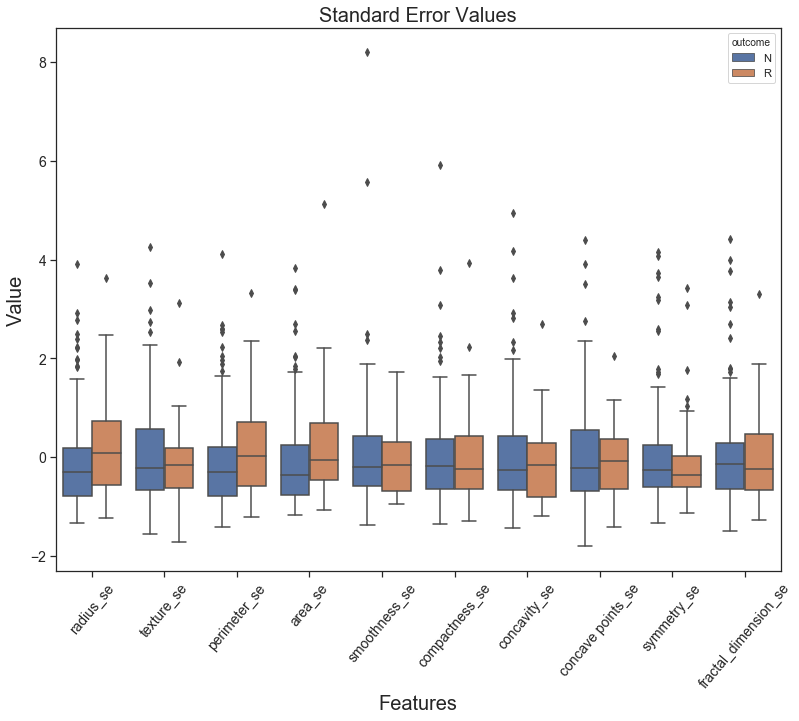

In [288]:
# Second ten features
data = pd.concat([y,data_n_2.iloc[:,10:20]],axis=1)
data = pd.melt(data,id_vars="outcome",
                    var_name="features",
                    value_name='value')
plt.figure(figsize=(13,10))
box_plot = sns.boxplot(x="features", y="value", hue="outcome", data=data)
box_plot.axes.set_title("Standard Error Values",fontsize=20)
box_plot.set_xlabel("Features",fontsize=20)
box_plot.set_ylabel("Value",fontsize=20)
box_plot.tick_params(labelsize=14)
plt.xticks(rotation=50)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

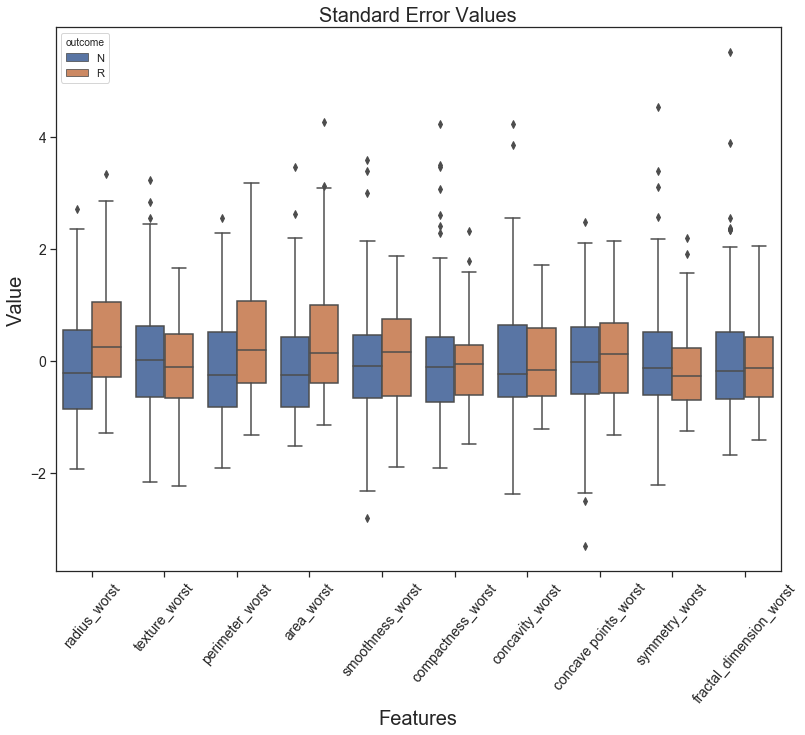

In [289]:
# Third ten features
data = pd.concat([y,data_n_2.iloc[:,20:30]],axis=1)
data = pd.melt(data,id_vars="outcome",
                    var_name="features",
                    value_name='value')

plt.figure(figsize=(13,10))
box_plot = sns.boxplot(x="features", y="value", hue="outcome", data=data)
box_plot.axes.set_title("Standard Error Values",fontsize=20)
box_plot.set_xlabel("Features",fontsize=20)
box_plot.set_ylabel("Value",fontsize=20)
box_plot.tick_params(labelsize=14)
plt.xticks(rotation=50)

(array([0, 1]), <a list of 2 Text xticklabel objects>)

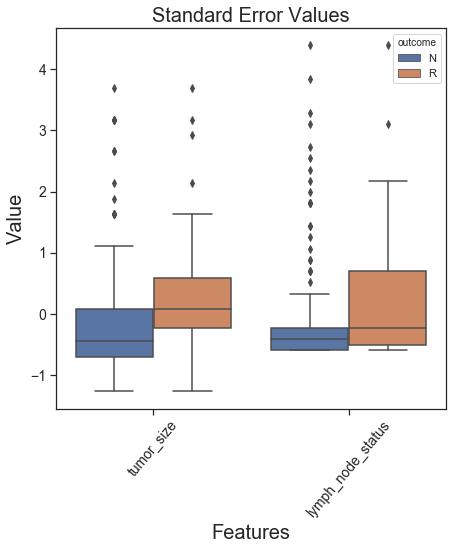

In [290]:
# Last two features

# Third ten features
data = pd.concat([y,data_n_2.iloc[:,30:32]],axis=1)
data = pd.melt(data,id_vars="outcome",
                    var_name="features",
                    value_name='value')

plt.figure(figsize=(7,7))
box_plot = sns.boxplot(x="features", y="value", hue="outcome", data=data)
box_plot.axes.set_title("Standard Error Values",fontsize=20)
box_plot.set_xlabel("Features",fontsize=20)
box_plot.set_ylabel("Value",fontsize=20)
box_plot.tick_params(labelsize=14)
plt.xticks(rotation=50)

## 4. Research Questions

The third research question will be answered in this notebook.
<br>
Question 3: Can we predict whether cancer will reoccur? If yes, can we predict the time the cancer will likely recur after patients have been treated?

## 5. Techniques

For predicting cancer recurrence, the similar techniques were used as the cancer diagnosis study. In the prognosis dataset, there were four missing values in the lymph node status. These missing values were replaced with the mean value of the lymph node status column. Feature selection was performed to keep only relevant features and remove all irrelevant or redundant features. Univariate selection method was used to select the features with the strongest relationship with the target variable. Chi-squared test was used to select the top five best features. The dataset was split into 75% training and 25% testing set, resulting in 148 and 50 samples respectively. We chose to use kNN and XGBoost for our analysis. Following data normalization, hyperparameter tuning was performed on both models, then model training, and model evaluation was achieved. Accuracy was determined by the 5-fold cross-validation score (Stone, 1974), and these values were compared for two models. The model with the highest accuracy was selected for predicting cancer prognosis.

## 6. Analysis

#### Feature selection

No additional missing values, errors, or duplicates were present in the data. Next step involved selecting the most important or relevant features out of the 35 features. This task was performed with a chi-squared (chi2) statistical test to select the five most significant features from the dataset.

Change the outcome variable to binary or dummy variable (0 = nonrecur and 1 = recur).

In [291]:
dummy_variable = pd.get_dummies(df['outcome'])
df = pd.concat([df, dummy_variable], axis = 1)
df.drop('outcome', axis = 1, inplace = True)
df.drop('N', axis = 1, inplace = True)
df.rename(columns = {'R': 'recur'}, inplace = True)

In [255]:
X = df.iloc[:,2:-1]  #independent columns
y = df.iloc[:,-1]    #target column i.e outcome

#apply SelectKBest class to extract top 5 best features
bestfeatures = SelectKBest(score_func=chi2, k=5)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(5,'Score'))  #print 5 best features

                Specs        Score
23         area_worst  2666.167018
3           area_mean   908.125356
13            area_se   148.869075
22    perimeter_worst    63.065828
31  lymph_node_status    50.590415


The result above shows the list of five most significant features with its corresponding score. As listed, the most important features were the worst area, mean area, standard error area, worst perimeter, and lymph node status.

In [256]:
X = df[['area_worst', 'area_mean', 'area_se', 'perimeter_worst', 'lymph_node_status']]
y = df.recur

In [257]:
df1 = df[['recur', 'area_worst', 'area_mean', 'area_se', 'perimeter_worst', 'lymph_node_status']]

#### KNN

##### 1. Normalize data

In [258]:
X_prime = X.values
X = preprocessing.scale(X_prime)

##### 2. Train test split

In [259]:
X_train, X_test, y_train, y_test =train_test_split(X, y, test_size=0.25, random_state=7)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (148, 5) (148,)
Test set: (50, 5) (50,)


##### 3. Hyperparameter tuning

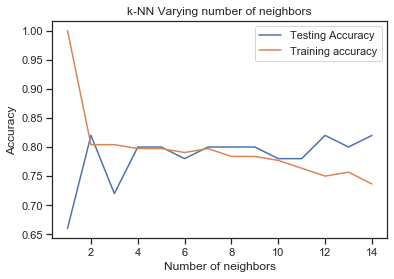

In [260]:
# 3. Calculate the best k value

# Setup arrays to store training and test accuracies
neighbors = np.arange(1,15)
train_accuracy =np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

for i,k in enumerate(neighbors):
    #Setup a knn classifier with k neighbors
    knn = KNeighborsClassifier(n_neighbors=k)
    #Fit the model 
    knn.fit(X_train, y_train) 
    #Compute accuracy on the training set 
    train_accuracy[i] = knn.score(X_train, y_train) 
    #Compute accuracy on the test set 
    test_accuracy[i] = knn.score(X_test, y_test) 

#Generate plot
plt.title('k-NN Varying number of neighbors')
plt.plot(neighbors, test_accuracy, label='Testing Accuracy')
plt.plot(neighbors, train_accuracy, label='Training accuracy')
plt.legend()
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.show()

In [261]:
Ks = 20
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))

for n in range(1,Ks):
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat=neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

print( "The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1)

The best accuracy was with 0.82 with k= 2


The best number of neighbours that maximizes the testing accuracy is when k = 2.

##### 4. Build and train model with training data

In [262]:
KNN = KNeighborsClassifier(n_neighbors = 2)
KNN.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=2)

##### 5. Evaluate the model's predictions

In [263]:
# Get training and testing accuracy and classification report.
y_pred_KNN = KNN.predict(X_test)
print("KNN Testing accuracy: ", KNN.score(X_test, y_test))
print("KNN Training accuracy: ", KNN.score(X_train, y_train))
print('\n')
print(metrics.classification_report(y_test, y_pred_KNN))
print('\n')

# 5-fold cross-validation
scores = cross_val_score(KNN, X, y, cv=5, scoring='accuracy')
print("Cross-validation scores:", scores)
KNN_CV = scores.mean()
print("Mean Cross-validation score:", KNN_CV)

KNN Testing accuracy:  0.82
KNN Training accuracy:  0.8040540540540541


              precision    recall  f1-score   support

           0       0.85      0.95      0.90        41
           1       0.50      0.22      0.31         9

    accuracy                           0.82        50
   macro avg       0.67      0.59      0.60        50
weighted avg       0.79      0.82      0.79        50



Cross-validation scores: [0.775      0.7        0.75       0.71794872 0.74358974]
Mean Cross-validation score: 0.7373076923076923


Following data normalization, the best value for the number of neighbors was calculated. The k value for kNN that maximized the testing accuracy was two, resulting in a testing accuracy of 0.82 and training accuracy of 0.80. F1 score for non-recur and recur was 0.90 and 0.31 respectively, and overall accuracy was 0.82. Five-fold cross-validation score was 0.737.

##### 6. Create confusion matrix

Text(0.5, 1, 'KNN Confusion Matrix')

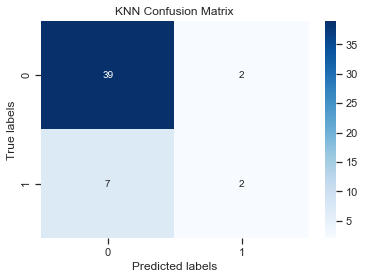

In [264]:
cm_KNN = confusion_matrix(y_test, y_pred_KNN)
ax = plt.subplot()
sns.heatmap(cm_KNN, annot=True, ax = ax, fmt='g', cmap = 'Blues') 

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels') 
ax.set_title('KNN Confusion Matrix')

#### XGBoost Classifier

##### 1. Hyperparameter tuning

In [265]:
params = {
    "learning_rate"    : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30],
    "max_depth"        : [3, 4, 5, 6, 8, 10, 12, 15],
    "min_child_weight" : [1, 3, 5, 7],
    "gamma"            : [0.0, 0.1, 0.2, 0.3, 0.4],
    "colsample_bytree" : [0.3, 0.4, 0.5, 0.7]
}

In [266]:
def timer(start_time=None):
    if not start_time:
        start_time = datetime.now()
        return start_time
    elif start_time:
        thour, temp_sec = divmod((datetime.now() - start_time).total_seconds(), 3600)
        tmin, tsec = divmod(temp_sec, 60)
        print('\n Time taken: %i hours %i minutes and %s seconds.' % (thour, tmin, round(tsec, 2)))

In [267]:
classifier = xgboost.XGBClassifier()

In [59]:
random_search = RandomizedSearchCV(classifier, param_distributions=params, n_iter=5, scoring='roc_auc', n_jobs=-1,
                                  cv=5, verbose=3)

In [60]:
from datetime import datetime
start_time = timer(None) #timing starts from this point for "start_time" variable
random_search.fit(X,y)
timer(start_time) #timing ends here for "start_time" variable

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.



 Time taken: 0 hours 0 minutes and 22.51 seconds.


[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:   22.3s finished


In [61]:
random_search.best_params_

{'min_child_weight': 7,
 'max_depth': 6,
 'learning_rate': 0.05,
 'gamma': 0.0,
 'colsample_bytree': 0.4}

Hyperparameter tuning for XGBoost using randomized search (cv = 5) resulted in the best parameters listed above. 

##### 2. Train test split

In [62]:
X_train, X_test, y_train, y_test =train_test_split(X, y, test_size=0.25, random_state=7)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (148, 5) (148,)
Test set: (50, 5) (50,)


##### 3. Build and train model wtih training data

In [63]:
XGB = xgboost.XGBClassifier(min_child_weight=7, max_depth=6, learning_rate=0.05, gamma=0.0, colsample_bytree=0.4)
XGB = XGB.fit(X_train, y_train)

##### 4. Evaluate the model's predictions

In [64]:
# Get training and testing accuracy and classification report
y_pred_XGB = XGB.predict(X_test)
print("XGB Testing accuracy: ", XGB.score(X_test, y_test))
print("XGB Training accuracy: ", XGB.score(X_train, y_train))
print("\n")
print(classification_report(y_test, y_pred_XGB))

#Cross-validation
scores = cross_val_score(XGB, X, y, cv=5, scoring='accuracy')
print("Cross-validation scores:", scores)
XGB_CV = scores.mean()
print("Mean Cross-validation score: ", XGB_CV)

XGB Testing accuracy:  0.86
XGB Training accuracy:  0.8040540540540541


              precision    recall  f1-score   support

           0       0.85      1.00      0.92        41
           1       1.00      0.22      0.36         9

    accuracy                           0.86        50
   macro avg       0.93      0.61      0.64        50
weighted avg       0.88      0.86      0.82        50

Cross-validation scores: [0.75       0.775      0.7        0.79487179 0.79487179]
Mean Cross-validation score:  0.7629487179487178


Testing and training accuracy were 0.86 and 0.80 respectively, f1-score for non-recur and recur was 0.92 and 0.36 respectively, overall f1-score was 0.86, and cross-validation score was 0.763.

##### 5. Confusion matrix

Text(0.5, 1, 'XGBoost Confusion Matrix')

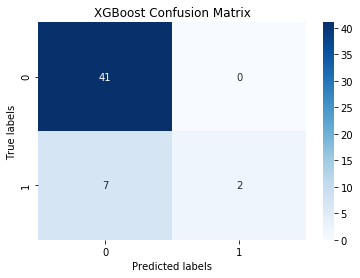

In [65]:
# Confusion matrix
cm_XGB = confusion_matrix(y_test, y_pred_XGB)

ax = plt.subplot()
sns.heatmap(cm_XGB,annot=True, ax = ax, fmt="g", cmap = 'Blues')

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels') 
ax.set_title('XGBoost Confusion Matrix')

A confusion matrix was presented to describe cancer prognosis prediction. The entire 41 patients who did not get cancer recurrence following treatment were correctly predicted. However, from the nine patients who did get cancer recurrence following treatment, only two of them had been correctly classified while seven of them had been erroneously diagnosed. This explains the low recall value for the recur group.

#### Summary table comparing accuracy between KNN and XGBoost

In [66]:
# KNN
accuracy_KNN, recall_KNN, precision_KNN, f1_KNN = accuracy_score(y_test, y_pred_KNN), recall_score(y_test, y_pred_KNN), precision_score(y_test, y_pred_KNN), f1_score(y_test, y_pred_KNN)
# XGBoost
accuracy_XGB, recall_XGB, precision_XGB, f1_XGB = accuracy_score(y_test, y_pred_XGB), recall_score(y_test, y_pred_XGB), precision_score(y_test, y_pred_XGB), f1_score(y_test, y_pred_XGB)

In [67]:
accuracy_table = pd.DataFrame(index = ['KNN', 'XGBoost'])
accuracy_table['Cross-validation'] = [KNN_CV, XGB_CV]
accuracy_table['Accuracy'] = [accuracy_KNN, accuracy_XGB]
accuracy_table['Recall'] = [recall_KNN, recall_XGB]
accuracy_table['Precision'] = [precision_KNN, precision_XGB]
accuracy_table['F1-score'] = [f1_KNN, f1_XGB]
accuracy_table.sort_values(by='Cross-validation', ascending=True)

,Cross-validation,Accuracy,Recall,Precision,F1-score
KNN,0.737308,0.82,0.222222,0.5,0.307692
XGBoost,0.762949,0.86,0.222222,1.0,0.363636


A summary table above displays cross-validation, accuracy, recall, precision, and F1-scores for KNN and XGBoost. As XGBoost performed better than KNN based on the cross-validation scores, we chose XGBoost to predict cancer recurrence.

#### Predicting when cancer will recur

We have been able to predict if cancer will recur with somewhat adequate accuracy. But can we predict the time cancer will recur? This question had to be tackled differently from our earlier questions because the target variable was numerical as opposed to categorical. Since patients who had cancer recurrence were only relevant in our analysis, the rows where the outcome was in the ‘recur’ category were filtered. This selection reduced the dataset to 47 rows. Again, univariate feature selection was performed to select a subset of features that had the strongest relationship with the recurrence time variable. These features were worst area, mean area, standard error area, lymph node status, and worst perimeter.

In [292]:
df_recur = df[df['recur'] == 1]

In [293]:
df_recur.shape

(47, 35)

In [294]:
X = df_recur.drop(['id', 'recur', 'time'], axis = 1) #independent columns
y = df_recur.time #target column i.e time

#apply SelectKBest class to extract top 5 best features
bestfeatures = SelectKBest(score_func=chi2, k=5)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(5,'Score'))  #print 3 best features

                Specs        Score
23         area_worst  9598.486491
3           area_mean  4386.888397
13            area_se  1124.893190
31  lymph_node_status   225.103007
22    perimeter_worst   218.977097


In [295]:
X = df_recur[['area_worst', 'area_mean', 'area_se', 'lymph_node_status', 'perimeter_worst']]
y = df_recur.time

In [296]:
df2 = df[['time', 'area_worst', 'area_mean', 'area_se', 'lymph_node_status', 'perimeter_worst']]

Each five features were plotted against the recurrence time variable (Figure 31) to visually decide what type of regression model was appropriate for our analysis.

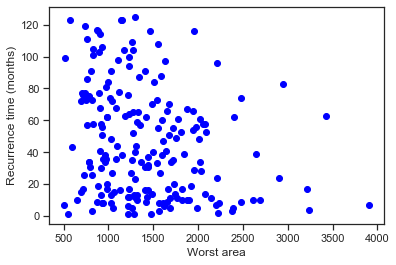

In [297]:
plt.scatter(df2.area_worst, df2.time,  color='blue')
plt.xlabel("Worst area")
plt.ylabel("Recurrence time (months)")
plt.show()

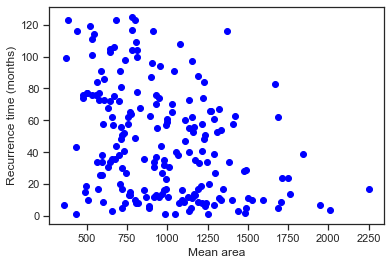

In [298]:
plt.scatter(df2.area_mean, df2.time,  color='blue')
plt.xlabel("Mean area")
plt.ylabel("Recurrence time (months)")
plt.show()

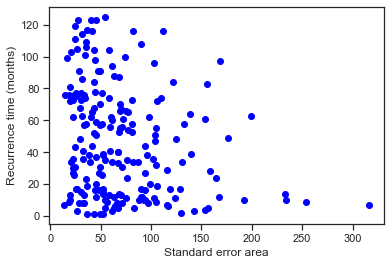

In [299]:
plt.scatter(df2.area_se, df2.time,  color='blue')
plt.xlabel("Standard error area")
plt.ylabel("Recurrence time (months)")
plt.show()

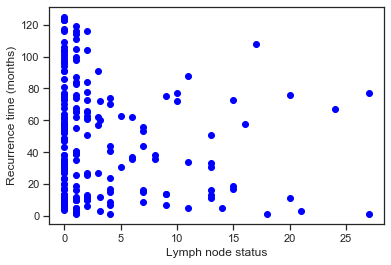

In [300]:
plt.scatter(df2.lymph_node_status, df2.time,  color='blue')
plt.xlabel("Lymph node status")
plt.ylabel("Recurrence time (months)")
plt.show()

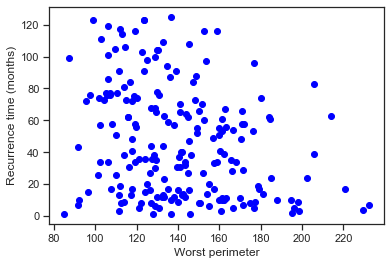

In [301]:
plt.scatter(df2.perimeter_worst, df2.time,  color='blue')
plt.xlabel("Worst perimeter")
plt.ylabel("Recurrence time (months)")
plt.show()

In [348]:
X_train, X_test, y_train, y_test =train_test_split(X, y, test_size=0.25, random_state=7)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (35, 5) (35,)
Test set: (12, 5) (12,)


It is unclear whether the relationship is linear or polynomial from visually examining the scatter plots. I tried using polynomial regression of degree two. The result displayed reports the accuracy of this model. Mean Absolute Error was 41.08, Mean Squared Error was 2338.74, and R2 score was -2.10.

In [349]:
poly = PolynomialFeatures(degree=2)
train_x_poly = poly.fit_transform(X_train)

clf = linear_model.LinearRegression()
train_y_ = clf.fit(train_x_poly, y_train)
# The coefficients
print ('Coefficients: ', clf.coef_)
print ('Intercept: ', clf.intercept_)

from sklearn.metrics import r2_score

test_x_poly = poly.fit_transform(X_test)
test_y_ = clf.predict(test_x_poly)

print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_ - y_test)))
print("Mean Squared Error (MSE): %.2f" % np.mean((test_y_ - y_test) ** 2))
print("R2-score: %.2f" % r2_score(test_y_ , y_test) )

Coefficients:  [ 0.00000000e+00  1.07484069e+00 -7.31322665e-01 -5.09471276e+00
  5.68344668e+00 -6.34980796e+00  2.47544288e-04 -2.39058913e-05
 -2.37141054e-03 -1.06122003e-02 -1.01349364e-02 -1.98746048e-04
  8.05376960e-05 -8.32614960e-03  8.02886249e-03  9.31344363e-04
 -5.91959182e-03  6.11161052e-02  1.47128646e-01  1.38233391e-01
  2.05035771e-02]
Intercept:  317.8574098439124
Mean absolute error: 41.08
Mean Squared Error (MSE): 2338.74
R2-score: -2.10


In [354]:
MAE = np.mean(np.absolute(test_y_ - y_test))
MSE = np.mean((test_y_ - y_test) ** 2)
R2 = r2_score(test_y_ , y_test)

In [355]:
Regression_table = pd.DataFrame(index = ['Polynominal regression'])
Regression_table['Degree'] = [2]
Regression_table['MAE'] = [MAE]
Regression_table['MSE'] = [MSE]
Regression_table['R2'] = [R2]

In [356]:
Regression_table

,Degree,MAE,MSE,R2
Polynominal regression,2,41.084732,2338.740191,-2.103094


The Mean Absolute Error and Mean Squared Error values appeared fairly large, and the R2 score was a negative value. From these results, it is inferred that the polynomial regression model did not closely fit my data as the data values did not closely represent the fitted polynomial regression line. Consequently, I do not think we can accurately predict the time of recurrence from this model due to limitations, which will be further addressed in the discussion.

## 7. Discussion

As a continuation of the diagnosis study, cancer prognosis was also investigated. We had seen that XGBoost had slightly better performance (76.3% cross-validation accuracy) compared to kNN (73.7%). However, in both models, recall score was substantially low (22% for both) for the ‘Recur’ patients group while relatively high recall score was observed for ‘Non-recur’ patients group (95% and 100% for kNN and XGBoost respectively). Explanation for this low recall score in ‘Recur’ group was almost certainly due to the small sample size. There were only nine patients in the ‘Recur’ class as opposed to 41 patients in the ‘Non-recur’ class.
<br>
<br>
Although we could have used logistic regression in this study since logistic regression seemed suitable for this research, we did not end up choosing this model because there were many features that were significantly correlated with each other. For example, from the five selected features in our dataset, four features (area_worst, area_mean, area_se, and perimeter_worst), were highly dependent with one another. Removing these features would result in training a model with only one feature, which would not be ideal as it may lead to overfitting.
<br>
<br>
The second part of this question was concerned with predicting time for cancer recurrence. As addressed in the analysis section, no distinct trend was noticeable when the features were plotted against the time variable. We estimated perhaps using a polynomial regression model of degree two may potentially work, however, as previously denoted, the results produced a considerably high error values and low R2 accuracy score. For limitations for our prognosis study, it is worth noting that although patients were labeled as nonrecurrent (N), it is never certain if the disease was in fact, nonrecurrent for these patients. It is possible that cancer recurred later in time after the study was complete, but this data would not be documented in the study. In addition, there is no specific cutoff value at which point the patient is considered a nonrecurrent case as it is simply the time of their last check-up. One final point to denote is the fact that cancer recurrence occurred at a moment in time before it has actually been detected. The values in “time to recur" field is not the actual time the cancer recurred, but the time that the recurrence was detected, although it is assumed that this difference between the actual and detected time is small.
<br>
<br>
For future research, it would be worthwhile and interesting to study the relationship between gene expression and breast cancer. Since cancer diagnosis correlates with gene expression, our impetus for this further study may prove more effective than looking at cells from tissues. (Mazzanti et al., 2004).

## 8. References

Government of Canada (2019). Breast cancer. Retrieved from https://www.canada.ca/en/public-health/services/chronic-diseases/cancer/breast-cancer.html

Mazzanti, C., Zeiger, A. M., Costourous, N., …Libutti, S. K. (2004). Using Gene Expression Profiling to Differentiate Benign versus Malignant Thyroid Tumors. Cancer Research, 64(8), 2898-2903.

Scikit-learn (2020). Post pruning decision trees with cost complexity pruning. Retrieved from https://scikit-learn.org/stable/auto_examples/tree/plot_cost_complexity_pruning.html

Stone, M. (1974). Cross-validatory choice and assessment of statistical predictions. Journal of the Royal Statistical Society, 36(2), 111-147.

Street W. N., Wolberg W. H., & Mangasarian, O. L. (1993). Nuclear feature extraction for breast tumor diagnosis. IS&T/SPIE 1993 International Symposium on Electronic Imaging: Science and Technology, 1905, 861-870.

UCI Machine Learning Repository (1995). Breast Cancer Wisconsin (Diagnostic) Data Set. Archive.Ics.Uci.Edu, 2020, Retrieved from https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+(Diagnostic).

Wolberg W. H., Street W. N., Heisey, D., & Mangasarian, O. L. (1994). Machine learning techniques to diagnose breast cancer from fine-needle aspirates. Cancer Letters, 77, 163-171.

Wolberg W. H., Street W. N., Heisey, D., & Mangasarian, O. L. (1995). Image analysis and machine learning applied to breast cancer diagnosis and prognosis. Analytical and Quantitative Cytology and Histology, 17(2), 77-87.

Wolberg W. H., Street W. N., Heisey, D., & Mangasarian, O. L. (1995). Computerized breast cancer diagnosis and prognosis from fine needle aspirates.  Archives of Surgery, 130(5), 511-516.

Wolberg W. H., Street W. N., Heisey, D., & Mangasarian, O. L. (1995). Computer-derived nuclear features distinguish malignant from benign breast cytology. Human Pathology, 26(7), 792-796.


Wolberg W. H., Street W. N., Heisey, D., & Mangasarian, O. L. (1995). Breast Cancer Diagnosis and Prognosis via Linear Programming. Operations Research, 43(4), 570–577. 

World Health Organization (2020). Breast cancer. Retrieved from https://www.who.int/cancer/prevention/diagnosis-screening/breast-cancer/en/

## 9. Appendix

Scatterplot marix showing the correlation between features.

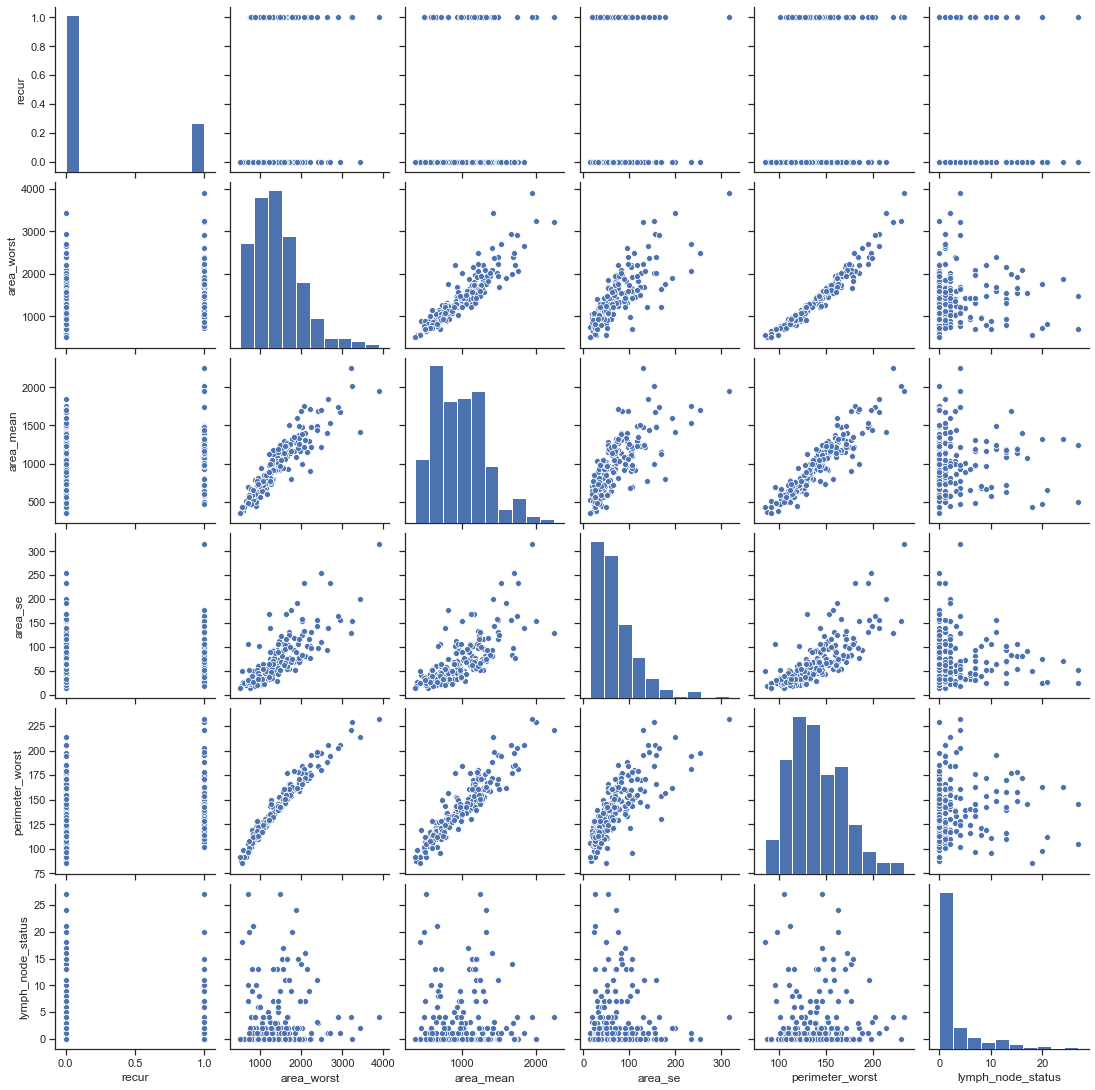

In [220]:
sns.set(style="ticks")

sns.pairplot(df1)